In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [107]:
df.columns = df.columns.str.strip().str.lower()


In [81]:
df = pd.read_csv ('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [82]:
df.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [83]:
df.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [84]:
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [85]:
df.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [86]:
df.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [87]:
df.describe ()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Age skewness:  0.03030835703000607
Na to K skewness:  1.039341186028881


/var/folders/m1/rzb2dybj47n4nyft9hh0fx200000gp/T/ipykernel_69941/2276863066.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']);


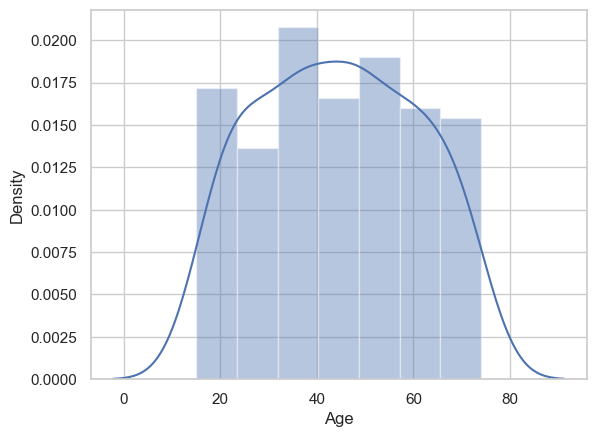

In [88]:
skewAge = df.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

skewNatoK = df.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

sns.distplot(df['Age']);


/var/folders/m1/rzb2dybj47n4nyft9hh0fx200000gp/T/ipykernel_69941/2159397142.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (df['Na_to_K']);


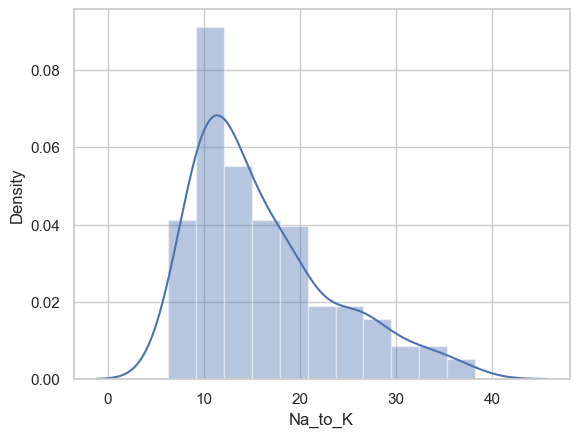

In [89]:
sns.distplot (df['Na_to_K']);

/var/folders/m1/rzb2dybj47n4nyft9hh0fx200000gp/T/ipykernel_69941/1459845261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Drug", data=df, palette="pastel")


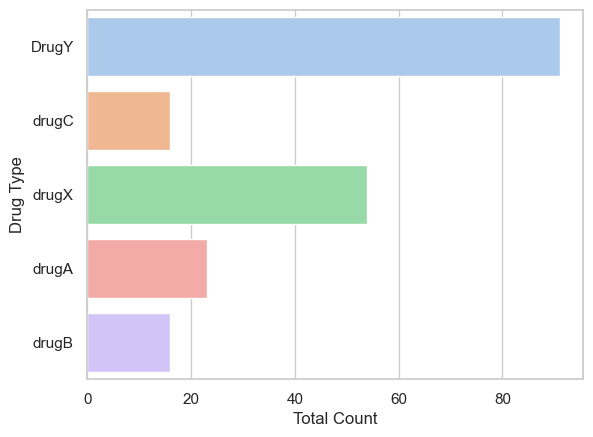

In [90]:
# Drug Type Distribution 

sns.set_theme (style="whitegrid")
sns.countplot(y="Drug", data=df, palette="pastel")
plt.ylabel ('Drug Type')
plt.xlabel ('Total Count')
plt.show()


/var/folders/m1/rzb2dybj47n4nyft9hh0fx200000gp/T/ipykernel_69941/2203214212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="flare")


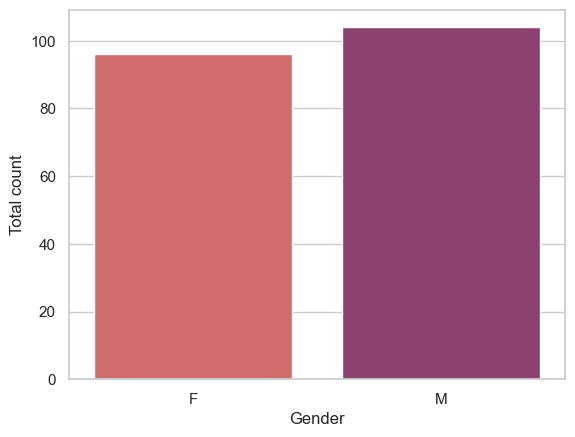

In [91]:
# Gender Distribution

sns.set_theme(style="whitegrid")
sns.countplot(x="Sex", data=df, palette="flare")
plt.xlabel('Gender')
plt.ylabel('Total count')
plt.show()


/var/folders/m1/rzb2dybj47n4nyft9hh0fx200000gp/T/ipykernel_69941/3273797512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (y="BP", data=df, palette ="crest")


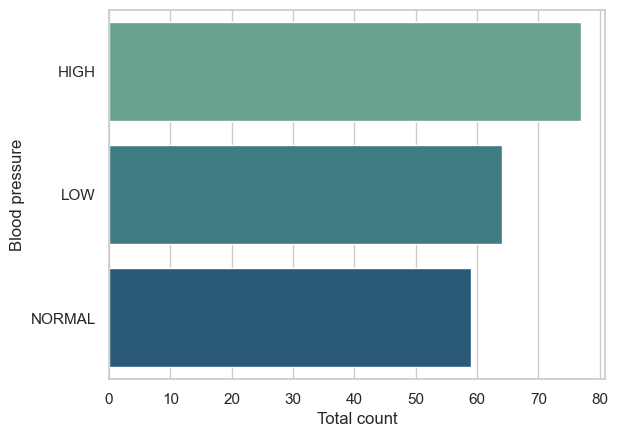

In [92]:
# Blood Pressure Distribution

sns.set_theme (style="whitegrid")
sns.countplot (y="BP", data=df, palette ="crest")
plt.ylabel ('Blood pressure')
plt.xlabel ('Total count')
plt.show()

/var/folders/m1/rzb2dybj47n4nyft9hh0fx200000gp/T/ipykernel_69941/1371603609.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (x="Cholesterol", data=df, palette= "rocket")


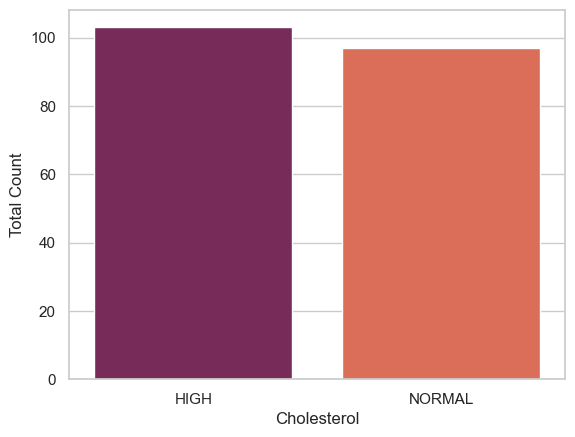

In [93]:
# Cholestrol Distribution

sns.set_theme (style = "whitegrid")
sns.countplot (x="Cholesterol", data=df, palette= "rocket")
plt.xlabel ('Cholesterol')
plt.ylabel ('Total Count')
plt.show ()

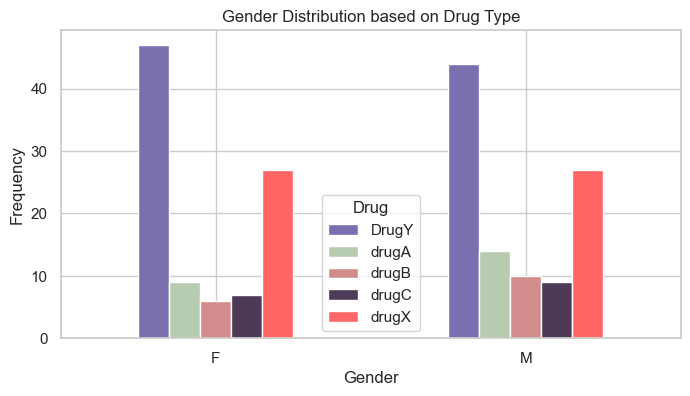

In [94]:
# Gender Distribution based on Drug Type

pd.crosstab (df.Sex, df.Drug).plot(kind="bar", figsize =(8,4), color=['#7b6faf','#b7cbb1','#d28c8c', '#4c3a57','#ff6666'])
plt.title ('Gender Distribution based on Drug Type')
plt.xlabel ('Gender')
plt.xticks(rotation=0)

plt.ylabel ('Frequency')

plt.show()

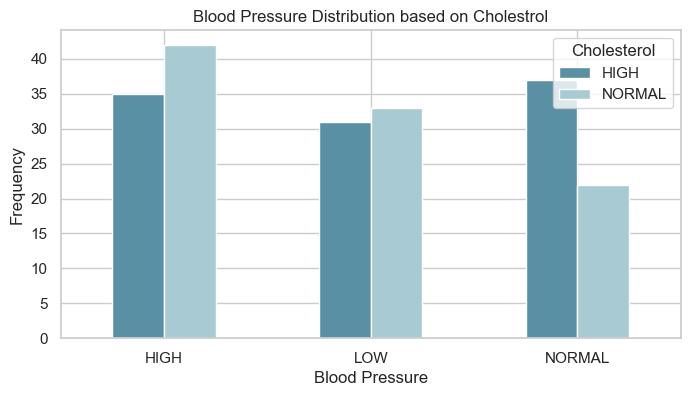

In [95]:
# Blood Pressure Distribution based on Cholestrol
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(8,4),color=['#5990a4','#a8cad3'])

plt.title ('Blood Pressure Distribution based on Cholestrol')
plt.xlabel ('Blood Pressure')
plt.xticks(rotation=0)

plt.ylabel ('Frequency')  
plt.show()                      

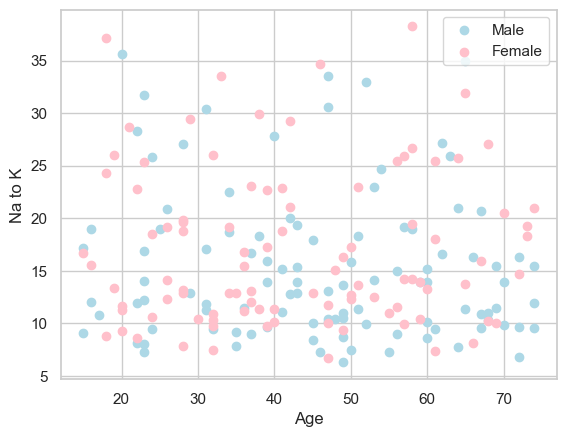

In [96]:
# Sodium to Potassium Distribution based on Gender + Age

plt.scatter (x=df.Age [df.Sex=='M'], y=df.Na_to_K [(df.Sex=='M')], c="lightblue")
plt.scatter (x=df.Age [df.Sex=='F'], y=df.Na_to_K [(df.Sex=='F')], c="pink")
plt.legend (['Male','Female'])
plt.xlabel ("Age")
plt.ylabel ("Na to K")
plt.show()

In [176]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure target aligns
X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [178]:
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))


ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by LogisticRegression.